In [2]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
%load_ext autoreload
%autoreload 2
from util import split_agents, compute_pairwise_distance


In [3]:
from casadi import Opti


In [4]:
import util
from matplotlib.font_manager import FontProperties
font_path = '/usr/share/fonts/truetype/palatino/Palatino Normal.ttf'
# Create FontProperties object with the specified font file
font_prop = FontProperties(fname=font_path)

#### 3-D trajectory simulation

In [253]:
trajectory_data = np.load("admm_consensus_BVC_nonconvex_5.npz")
# trajectory_data = np.load("admm_consensus_BVC_nonconvex_3.npz")

In [254]:
X_full = trajectory_data['X_full']
xr = trajectory_data['xr']
x0 = trajectory_data['x0']
obj_trj = trajectory_data['obj_trj']
obj_hist = trajectory_data['obj_hist']

In [255]:
x0.T

array([[ 0.5,  1.5,  1.5,  0. ,  0. ,  0. ,  2.5,  1.5,  1.2,  0. ,  0. ,
         0. ,  1. , -1.3,  0.8,  0. ,  0. ,  0. , -2. ,  2. ,  1.9,  0. ,
         0. ,  0. ,  3. , -1.5,  1.4,  0. ,  0. ,  0. ]])

Text(0, 0.5, 'Cost to go')

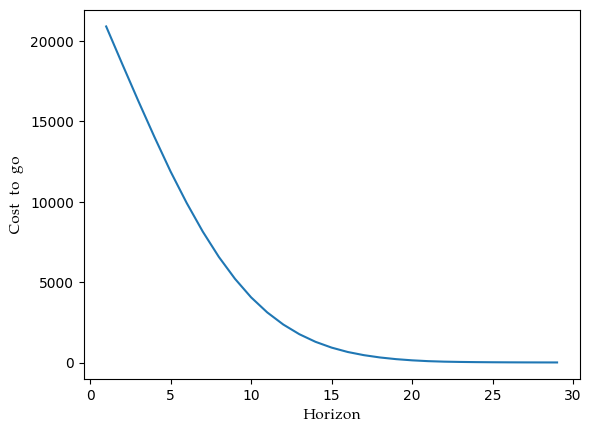

In [256]:
plt.figure(dpi=100)
plt.plot(obj_hist)
plt.xlabel('Horizon',fontproperties=font_prop,fontsize=13)
plt.ylabel('Cost to go',fontproperties=font_prop,fontsize=13)
# plt.savefig('figures/3_drones_convex(cost)')

In [241]:
xr.T

array([[ 2.5,  1.5,  1.5,  0. ,  0. ,  0. ,  0.5,  1.5,  1.7,  0. ,  0. ,
         0. ,  1.5,  2.2,  1. ,  0. ,  0. ,  0. ,  3. , -1.5,  1.4,  0. ,
         0. ,  0. ,  1. , -1.3,  0.8,  0. ,  0. ,  0. ]])

In [242]:
util.distance_to_goal(X_full[-1].flatten(), xr.flatten(),5, 6)

array([0.07901382, 0.06313763, 0.05181154, 0.04068781, 0.08264753])

In [243]:
x_dims = [6]*5

In [244]:
X_full.shape

(39, 30)

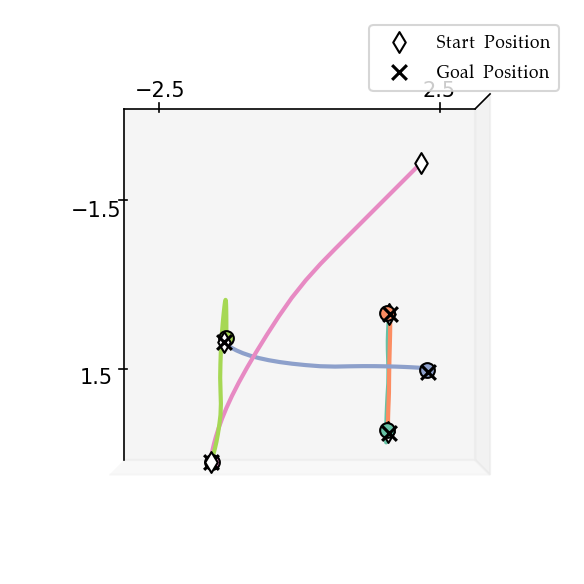

In [247]:
plt.figure(dpi=150)
# fig = plt.figure(dpi=150)
# ax = fig.add_subplot(111, projection='3d')
util.plot_solve(X_full, float(obj_trj), xr, x_dims, True, 3)
plt.legend(plt.gca().get_children()[1:3], ["Start Position", "Goal Position"],prop=font_prop)
plt.gca().set_xticks([-1.5,1.5])
plt.gca().set_yticks([-2.5,2.5])
plt.gca().set_zticks([0.5,2.0])
plt.gca().set_xlim([-3, 3])
plt.gca().set_ylim([-3, 3])
plt.gca().set_zlim([0, 2])

# Set ticks for x, y, and z axes

plt.gca().grid('')
plt.title("");
plt.gca().view_init(elev=90, azim=0)
plt.gca().set_zticks([])
plt.savefig('figures/BVC_5_drones_convex_topDown', bbox_inches='tight', dpi=200)
# plt.show()

In [248]:
compute_pairwise_distance(X_full,x_dims).min(),compute_pairwise_distance(X_full,x_dims).max()

(0.6285406489734154, 6.123724356957945)

In [249]:
compute_pairwise_distance(X_full,x_dims).shape

(39, 10)

In [250]:
r_min= 2*0.3

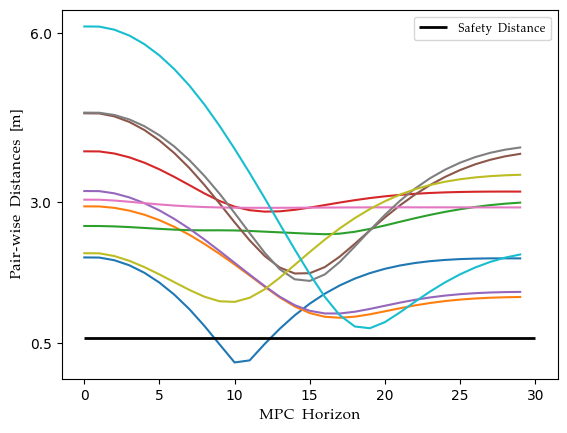

In [257]:
plt.figure(dpi=100)
plt.plot(compute_pairwise_distance(X_full,x_dims),label='')
plt.hlines(r_min, 0, X_full.shape[0] ,color='k',linewidth=2)
plt.ylabel('Pair-wise Distances [m]',fontproperties=font_prop,fontsize=13)
plt.xlabel('MPC Horizon',fontproperties=font_prop,fontsize=13)
plt.yticks([0.5, 3, 6])
# plt.legend(['safety distance'],loc = 'upper right', prop = font_prop, fontsize=14)
# plt.gca().legend(['safety distance'],loc = 'upper right', prop = font_prop, fontsize=14)
plt.legend(plt.gca().get_children()[10:11],['Safety Distance'],loc = 'upper right', prop = font_prop, fontsize=14)
plt.savefig('figures/5_drones_pairwise_distances(nonconvex).png',dpi=200)